### Time Series Data Analytics

In [1]:
# import IPython
# print(IPython.sys_info())
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# %matplitlib inline #  will make your plot outputs appear and be stored within the notebook. 
from math import sqrt
import sys, os
from contextlib import contextmanager
import matplotlib as mpl
import seaborn as sns
import sklearn

In [2]:
df = pd.read_csv('./data/data.csv')
df.head(12)

,Period,Sales
0,1,5384
1,2,6118
2,3,7825
3,4,8081
4,5,9139
5,6,9156
6,7,9693
7,8,10717
8,9,10282
9,10,10990


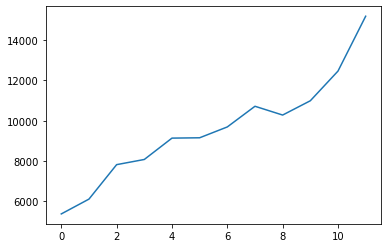

In [3]:
plt.plot(df['Sales'])
plt.show()

### 3. Predict future demand in month 13, 14, 15, 16

#### a. Using moving average

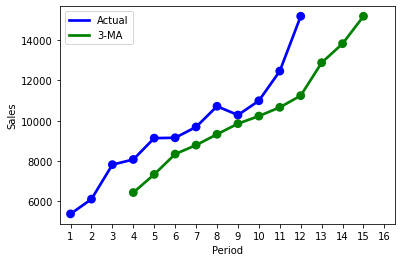

In [4]:
import seaborn as sns

# Using moving average
def moving_average(df, k, to_period):
    moving_average_df = pd.DataFrame(columns=['Period', 'Sales'])
    num_df = len(df)
    for m in range(0, to_period):
        if m < k:
            sale_predict = float('nan')
        else:
            history = df['Sales'][m-k:m]
            sale_predict = history.mean()
        moving_average_df.loc[m] = [m+1, sale_predict]
        
    moving_average_df['Period'] = moving_average_df['Period'].astype(int)
    return moving_average_df

f, ax = plt.subplots(1, 1)
ma_df = moving_average(df, 3, 16)
sns.pointplot(x='Period', y='Sales', data=df, color='b')
sns.pointplot(x='Period', y='Sales', data=ma_df, color='g')
ax.legend(handles=ax.lines[::len(df)+1], labels=['Actual', '3-MA'])
plt.show()
            

#### b. Using linear regression

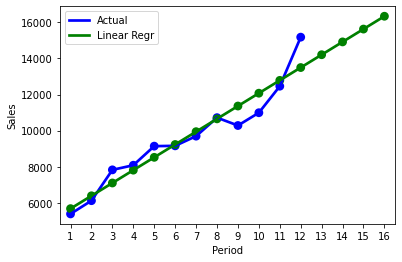

In [5]:
import seaborn as sns

def linear_regression(df):
    linear_df = df.copy()
    linear_df['PeriodSales'] = linear_df['Period'] * linear_df['Sales']
    linear_df['Period_2'] = linear_df['Period'] * linear_df['Period']
    linear_df['Sales_2'] = linear_df['Sales'] * linear_df['Sales']
    linear_sum = linear_df.sum()
    linear_mean = linear_df.mean()
    
    b = (linear_sum['PeriodSales'] - len(df) * linear_mean['Period'] * linear_mean['Sales'] ) \
         / (linear_sum['Period_2'] - len(df) * linear_mean['Period'] * linear_mean['Period'])
    
    a = linear_mean['Sales'] - b * linear_mean['Period']
    return a, b

a,b = linear_regression(df)
linear_df = pd.DataFrame(columns=['Period', 'Sales'])
for m in range(1, 17):
    sale = a + b * m
    linear_df.loc[m-1] = [m,sale]
linear_df['Period'] = linear_df['Period'].astype(int)

f, ax = plt.subplots(1, 1)
sns.pointplot(ax=ax, x='Period', y='Sales', data=df, color='b')
sns.pointplot(ax=ax, x='Period', y='Sales', data=linear_df, color='g')

ax.legend(handles=ax.lines[::len(df)+2], labels=['Actual', 'Linear Regr'])
    


### 4. Evaluation: compare the above implemented methods

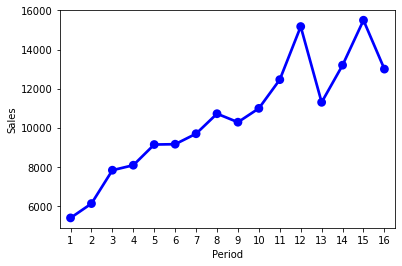

In [6]:
eval_df = pd.read_csv('./data/actual.csv')
eval_df = pd.concat([df, eval_df], ignore_index=True)
sns.pointplot(x='Period', y='Sales', data=eval_df, color='b')

##### Compare: use mean square error (MSE) to evaluate abloe methods

In [9]:
MSE = (eval_df['Sales'][12:16] - moving_average(eval_df, 3, 16)['Sales'][12:16])**2
MSE = MSE.mean()
print("MSE of {0}: {1}".format("Exponential smoothing with alpha=0.8", MSE))
MSE = (eval_df['Sales'][12:16] - linear_df['Sales'][12:16])**2
MSE = MSE.mean()
print("MSE of {0}: {1}".format("Linear Regression", MSE))

MSE of Exponential smoothing with alpha=0.8: 1953817.416666667
MSE of Linear Regression: 5629390.883826157


#### Which one produced the best prediction?

Answer: 